<a href="https://colab.research.google.com/github/Nawapat2541/Simulated_annealing/blob/main/Simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import inspect as ins
import numpy as np
import math as m
import matplotlib.pyplot as plt
import random as rand

In [59]:
def delta_c(func, a, b):
  return abs(func(a) - func(b))

In [125]:
objective_function = lambda x:  (x+3)*(x-2)**2*(x+1)**3

In [ ]:
diff = diff_value(objective_function, 3, 5)
print(diff)

124


old-present ratio is less than tolerace
0 -2.0835109346627654
1 -4.5199482561172175
2 -3.026636429255741
3 -2.7870772347814547
4 -2.708312027806091
5 -2.479294644108652
6 -2.513498919529986
7 -2.572471254736789
8 -2.580647694553987
9 -2.5635501232484854
10 -2.567750342221074
11 -2.5705998702330297
12 -2.5723449426646208
13 -2.5734049946952795
14 -2.573777757271132
15 -2.5739789074836588
16 -2.5740124720561535
17 -2.574083443827292
18 -2.5741161219770525
19 -2.5741280035153404
20 -2.5741374390555714
21 -2.5741412302703366
22 -2.5741428721801842
23 -2.574143850636129
24 -2.5741443094301646
25 -2.574144338649589
26 -2.574144465376419
27 -2.5741445181922487
28 -2.5741445516198422
29 -2.574144553297073
30 -2.5741445622272723
31 -2.574144562656026
32 -2.5741445630429927
33 -2.57414456390778
34 -2.5741445640452025
35 -2.5741445642903926
36 -2.574144564332889


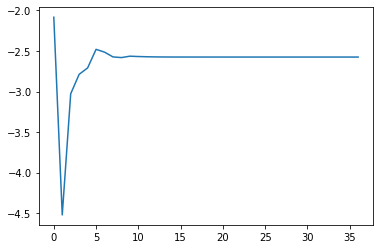

In [153]:
xlist = simulated_annealing(objective_function, -0.5, 20, 1250, tol=5e-11)
for idx, val in enumerate(xlist):
    print(idx, val)
plt.plot(xlist)

In [152]:
def simulated_annealing(input_function, x0, rand_range=10, kmax=1000, tol=1e-10):
  xlist = []
  k=1
  xpresent = x0
  while(k<=kmax):
    xold = xpresent
      
    if k>=kmax/10 and k<=kmax/2:
      rand_range =  rand_range - rand_range*0.2
    elif k<=3*kmax/4:
      rand_range =  rand_range - rand_range*0.5
    elif k<=9*kmax/10:
      rand_range =  rand_range - rand_range*0.8
    else:
      rand_range =  rand_range - rand_range*0.95
    
    if input_function(xpresent+0.01) < input_function(xpresent):
      rand_x = rand.uniform(xpresent, xpresent+rand_range)
    else:
      rand_x = rand.uniform(xpresent-rand_range, xpresent)

    if input_function(rand_x) <  input_function(xpresent):
      xpresent = rand_x
    elif prob_func(input_function, xold, xpresent) >= rand.random():
      xpresent = rand_x    

    xlist.append(xpresent)
    k = k + 1

    # print(f"xold = {xold}, xpresent = {xpresent}")
    if(abs(xold-xpresent)/abs(xpresent) <= tol):
      print("old-present ratio is less than tolerace")
      break

    if(abs(input_function(xpresent)) <= tol):
      print("present func is less than tolerace")
      break
    
  return xlist

In [61]:
def prob_func(func, old, present):
  if delta_c(func, old, present) <= 0:
    return 1
  else:
    return m.e**(-delta_c(func, old, present)/present)